In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data


In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.909936e+07,1.909936e+07,NaN,1,NaN,NaN,None,2022-07-21T15:13:00.000Z,22580.956788,4.228938e+10,-18.2993,-0.049574,-6.345999,12.627056,5.074376,-24.530365,-43.517687,4.312817e+11,42.1394,4.742001e+11,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437
1,1027,Ethereum,ETH,ethereum,5835,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216384e+08,1.216384e+08,NaN,2,NaN,NaN,None,2022-07-21T15:12:00.000Z,1505.943604,2.086331e+10,-12.8433,0.568727,-5.829997,36.264948,27.650120,-25.208811,-49.487746,1.831806e+11,17.8981,1.831806e+11,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437
2,825,Tether,USDT,tether,36441,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.000055,6.587621e+10,-15.3398,-0.000675,-0.015781,0.060004,0.091390,0.116343,-0.015178,6.584989e+10,6.4340,6.817072e+10,None,2022-07-21T15:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-21 15:13:26.390437
3,3408,USD Coin,USDC,usd-coin,4920,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.492791e+10,5.492791e+10,NaN,4,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.000093,8.265060e+09,-7.7673,0.023839,0.009871,-0.006506,-0.013228,-0.017639,-0.010985,5.493303e+10,5.3670,5.493303e+10,None,2022-07-21T15:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-21 15:13:26.390437
4,1839,BNB,BNB,bnb,1014,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-21T15:12:00.000Z,257.863475,1.444665e+09,-23.4629,-0.277373,-4.861321,11.546897,13.994374,-19.039665,-37.033337,4.160299e+10,4.0649,5.157269e+10,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437
5,4687,Binance USD,BUSD,binance-usd,4095,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.999994,7.581846e+09,-14.1465,-0.006371,0.130045,0.001457,0.009293,-0.193990,-0.034289,1.754711e+10,1.7145,1.754711e+10,None,2022-07-21T15:13:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-21 15:13:26.390437
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.351901,1.347604e+09,-17.9891,-0.148328,-6.516351,10.898777,5.383322,-15.830219,-51.226919,1.701199e+10,1.6622,3.519011e+10,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437
7,2010,Cardano,ADA,cardano,519,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-07-21T15:12:00.000Z,0.481534,1.120178e+09,-34.5785,-0.134591,-8.634254,12.866069,-4.540995,-10.752497,-46.931585,1.624648e+10,1.5874,2.166902e+10,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437
8,5426,Solana,SOL,solana,350,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.456124e+08,5.116169e+08

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
    #df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')



In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

#Interrupt it after some time to see the latest tickers

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\shubh\AppData\Local\Temp\ipykernel_24100\2828157999.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19099356.00000,19099356.00000,NaN,1,NaN,NaN,None,2022-07-21T15:13:00.000Z,22580.95679,42289377523.99203,-18.29930,-0.04957,-6.34600,12.62706,5.07438,-24.53036,-43.51769,431281732519.78259,42.13940,474200092553.66998,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
1,1027,Ethereum,ETH,ethereum,5835,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121638428.56150,121638428.56150,NaN,2,NaN,NaN,None,2022-07-21T15:12:00.000Z,1505.94360,20863311363.32931,-12.84330,0.56873,-5.83000,36.26495,27.65012,-25.20881,-49.48775,183180613517.95560,17.89810,183180613517.95999,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
2,825,Tether,USDT,tether,36441,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65846277711.17902,68166976393.37135,NaN,3,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.00005,65876214429.99663,-15.33980,-0.00067,-0.01578,0.06000,0.09139,0.11634,-0.01518,65849894095.50797,6.43400,68170720234.23000,None,2022-07-21T15:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-21 15:13:26.390437,NaT
3,3408,USD Coin,USDC,usd-coin,4920,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54927907574.76263,54927907574.76263,NaN,4,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.00009,8265059836.67819,-7.76730,0.02384,0.00987,-0.00651,-0.01323,-0.01764,-0.01098,54933027812.12553,5.36700,54933027812.13000,None,2022-07-21T15:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-21 15:13:26.390437,NaT
4,1839,BNB,BNB,bnb,1014,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-21T15:12:00.000Z,257.86347,1444664954.42911,-23.46290,-0.27737,-4.86132,11.54690,13.99437,-19.03966,-37.03334,41602986770.74861,4.06490,51572694974.09000,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
5,4687,Binance USD,BUSD,binance-usd,4095,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.99999,7581846404.73170,-14.14650,-0.00637,0.13004,0.00146,0.00929,-0.19399,-0.03429,17547113404.27199,1.71450,17547113404.27000,None,2022-07-21T15:13:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-21 15:13:26.390437,NaT
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.35190,1347604244.30455,-17.98910,-0.14833,-6.51635,10.89878,5.38332,-15.83022,-51.22692,17011989945.09096,1.66220,35190108875.65000,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
7,2010,Cardano,ADA,cardano,519,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-21T15:12:00.000Z,0.48153,1120177804.14310,-34.57850,-0.13459,-8.63425,12.86607,-4.54100,-10.75250,-46.93159,16246479420.02347,1.58740,21669016745.98000,N

In [26]:
# One thing I noticed was the scientific notation. I want to be able to see the numbers in this case.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19099356.00000,19099356.00000,NaN,1,NaN,NaN,None,2022-07-21T15:13:00.000Z,22580.95679,42289377523.99203,-18.29930,-0.04957,-6.34600,12.62706,5.07438,-24.53036,-43.51769,431281732519.78259,42.13940,474200092553.66998,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
1,1027,Ethereum,ETH,ethereum,5835,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121638428.56150,121638428.56150,NaN,2,NaN,NaN,None,2022-07-21T15:12:00.000Z,1505.94360,20863311363.32931,-12.84330,0.56873,-5.83000,36.26495,27.65012,-25.20881,-49.48775,183180613517.95560,17.89810,183180613517.95999,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
2,825,Tether,USDT,tether,36441,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,65846277711.17902,68166976393.37135,NaN,3,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.00005,65876214429.99663,-15.33980,-0.00067,-0.01578,0.06000,0.09139,0.11634,-0.01518,65849894095.50797,6.43400,68170720234.23000,None,2022-07-21T15:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-21 15:13:26.390437,NaT
3,3408,USD Coin,USDC,usd-coin,4920,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54927907574.76263,54927907574.76263,NaN,4,NaN,NaN,None,2022-07-21T15:12:00.000Z,1.00009,8265059836.67819,-7.76730,0.02384,0.00987,-0.00651,-0.01323,-0.01764,-0.01098,54933027812.12553,5.36700,54933027812.13000,None,2022-07-21T15:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-21 15:13:26.390437,NaT
4,1839,BNB,BNB,bnb,1014,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-07-21T15:12:00.000Z,257.86347,1444664954.42911,-23.46290,-0.27737,-4.86132,11.54690,13.99437,-19.03966,-37.03334,41602986770.74861,4.06490,51572694974.09000,None,2022-07-21T15:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
5,4687,Binance USD,BUSD,binance-usd,4095,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.99999,7581846404.73170,-14.14650,-0.00637,0.13004,0.00146,0.00929,-0.19399,-0.03429,17547113404.27199,1.71450,17547113404.27000,None,2022-07-21T15:13:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-21 15:13:26.390437,NaT
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,None,2022-07-21T15:13:00.000Z,0.35190,1347604244.30455,-17.98910,-0.14833,-6.51635,10.89878,5.38332,-15.83022,-51.22692,17011989945.09096,1.66220,35190108875.65000,None,2022-07-21T15:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-21 15:13:26.390437,NaT
7,2010,Cardano,ADA,cardano,519,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,8,NaN,NaN,None,2022-07-21T15:12:00.000Z,0.48153,1120177804.14310,-34.57850,-0.13459,-8.63425,12.86607,-4.54100,-10.75250,-46.93159,16246479420.02347,1.58740,21669016745.98000,N

In [28]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.02825,-6.35903,12.55676,5.00670,-24.51435,-43.49731
Ethereum,0.68957,-5.84681,36.12238,27.70578,-25.17706,-49.51096
Tether,0.00010,-0.01411,0.06163,0.08998,0.12067,-0.01678
USD Coin,0.01525,0.00890,-0.00520,-0.00230,-0.00760,0.01811
BNB,-0.12144,-4.84718,11.54408,14.09913,-18.94953,-37.05922
Binance USD,-0.00543,0.04200,0.00144,0.01631,-0.14972,0.02366
XRP,-0.09277,-6.51467,10.86470,5.46928,-15.77149,-51.19315
Cardano,0.20136,-8.59807,12.90051,-4.36726,-10.66078,-46.92890
Solana,-0.10207,-8.90109,21.48052,8.30243,-19.87742,-58.73998


In [29]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.02825
             quote.USD.percent_change_24h    -6.35903
             quote.USD.percent_change_7d     12.55676
             quote.USD.percent_change_30d     5.00670
             quote.USD.percent_change_60d   -24.51435
             quote.USD.percent_change_90d   -43.49731
Ethereum     quote.USD.percent_change_1h      0.68957
             quote.USD.percent_change_24h    -5.84681
             quote.USD.percent_change_7d     36.12238
             quote.USD.percent_change_30d    27.70578
             quote.USD.percent_change_60d   -25.17706
             quote.USD.percent_change_90d   -49.51096
Tether       quote.USD.percent_change_1h      0.00010
             quote.USD.percent_change_24h    -0.01411
             quote.USD.percent_change_7d      0.06163
             quote.USD.percent_change_30d     0.08998
             quote.USD.percent_change_60d     0.12067
             quote.USD.percent_change_90

In [30]:
type(df4)

pandas.core.series.Series

In [31]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.02825
            quote.USD.percent_change_24h  -6.35903
            quote.USD.percent_change_7d   12.55676
            quote.USD.percent_change_30d   5.00670
            quote.USD.percent_change_60d -24.51435
            quote.USD.percent_change_90d -43.49731
Ethereum    quote.USD.percent_change_1h    0.68957
            quote.USD.percent_change_24h  -5.84681
            quote.USD.percent_change_7d   36.12238
            quote.USD.percent_change_30d  27.70578
            quote.USD.percent_change_60d -25.17706
            quote.USD.percent_change_90d -49.51096
Tether      quote.USD.percent_change_1h    0.00010
            quote.USD.percent_change_24h  -0.01411
            quote.USD.percent_change_7d    0.06163
            quote.USD.percent_change_30d   0.08998
            quote.USD.percent_change_60d   0.12067
            quote.USD.percent_change_90d  -0.01678
USD Coin    quote.USD.percent_change_1h    0.01525
            quote.USD.percent_change_24h   0.00890
            quote.USD.percent_change_7d   -0.00520
            quote.USD.percent_change_30d  -0.00230
            quote.USD.percent_change_60d  -0.00760
            quote.USD.percent_change_90d   0.01811
BNB         quote.USD.percent_change_1h   -0.12144
            quote.USD.percent_change_24h  -4.84718
            quote.USD.percent_change_7d   11.54408
            quote.USD.percent_change_30d  14.09913
            quote.USD.percent_change_60d -18.94953
            quote.USD.percent_change_90d -37.05922
Binance USD quote.USD.percent_change_1h   -0.00543
            quote.USD.percent_change_24h   0.04200
            quote.USD.percent_change_7d    0.00144
            quote.USD.percent_change_30d   0.01631
            quote.USD.percent_change_60d  -0.14972
            quote.USD.percent_change_90d   0.02366
XRP         quote.USD.percent_change_1h   -0.09277
            quote.USD.percent_change_24h  -6.51467
            quote.USD.percent_change_7d   10.86470
            quote.USD.percent_change_30d   5.46928
            quote.USD.percent_change_60d -15.77149
            quote.USD.percent_change_90d -51.19315
Cardano     quote.USD.percent_change_1h    0.20136
            quote.USD.percent_change_24h  -8.59807
            quote.USD.percent_change_7d   12.90051
            quote.USD.percent_change_30d  -4.36726
            quote.USD.percent_change_60d -10.66078
            quote.USD.percent_change_90d -46.92890
Solana      quote.USD.percent_change_1h   -0.10207
            quote.USD.percent_change_24h  -8.90109
            quote.USD.percent_change_7d   21.48052
            quote.USD.percent_change_30d   8.30243
            quote.USD.percent_change_60d -19.87742
            quote.USD.percent_change_90d -58.73998
Dogecoin    quote.USD.percent_change_1h   -0.34977
            quote.USD.percent_change_24h  -8.01413
            quote.USD.percent_change_7d   12.12098
            quote.USD.percent_change_30d   0.73319
            quote.USD.percent_change_60d -20.47496
            quote.USD.percent_change_90d -49.91410
Dai         quote.USD.percent_change_1h    0.13226
            quote.USD.percent_change_24h   0.03619
            quote.USD.percent_change_7d   -0.05096
            quote.USD.percent_change_30d  -0.02605
            quote.USD.percent_change_60d  -0.02038
            quote.USD.percent_change_90d   0.06518
Polkadot    quote.USD.percent_change_1h   -0.04777
            quote.USD.percent_change_24h  -8.32818
            quote.USD.percent_change_7d   13.48526
            quote.USD.percent_change_30d -10.20833
            quote.USD.percent_change_60d -28.01357
            quote.USD.percent_change_90d -60.15861
Polygon     quote.USD.percent_change_1h    0.05681
            quote.USD.percent_change_24h  -4.52601
            quote.USD.percent_change_7d   36.38778
            quote.USD.percent_change_30d  96.07214
            quote.USD.percent_change_60d  31.26347
            quo

In [32]:
df5.count()

values    90
dtype: int64

In [33]:
# I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02825
1,Bitcoin,quote.USD.percent_change_24h,-6.35903
2,Bitcoin,quote.USD.percent_change_7d,12.55676
3,Bitcoin,quote.USD.percent_change_30d,5.00670
4,Bitcoin,quote.USD.percent_change_60d,-24.51435
5,Bitcoin,quote.USD.percent_change_90d,-43.49731
6,Ethereum,quote.USD.percent_change_1h,0.68957
7,Ethereum,quote.USD.percent_change_24h,-5.84681
8,Ethereum,quote.USD.percent_change_7d,36.12238
9,Ethereum,quote.USD.percent_change_30d,27.70578


In [40]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.02825
1,Bitcoin,quote.USD.percent_change_24h,-6.35903
2,Bitcoin,quote.USD.percent_change_7d,12.55676
3,Bitcoin,quote.USD.percent_change_30d,5.00670
4,Bitcoin,quote.USD.percent_change_60d,-24.51435
5,Bitcoin,quote.USD.percent_change_90d,-43.49731
6,Ethereum,quote.USD.percent_change_1h,0.68957
7,Ethereum,quote.USD.percent_change_24h,-5.84681
8,Ethereum,quote.USD.percent_change_7d,36.12238
9,Ethereum,quote.USD.percent_change_30d,27.70578


In [41]:
#big words in the percentage column will mess the catplot, so chainging it to the simplest
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.02825
1,Bitcoin,quote.USD.percent_change_24h,-6.35903
2,Bitcoin,quote.USD.percent_change_7d,12.55676
3,Bitcoin,quote.USD.percent_change_30d,5.00670
4,Bitcoin,quote.USD.percent_change_60d,-24.51435
5,Bitcoin,quote.USD.percent_change_90d,-43.49731
6,Ethereum,1hr,0.68957
7,Ethereum,quote.USD.percent_change_24h,-5.84681
8,Ethereum,quote.USD.percent_change_7d,36.12238
9,Ethereum,quote.USD.percent_change_30d,27.70578


In [42]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.02825
1,Bitcoin,24h,-6.35903
2,Bitcoin,7d,12.55676
3,Bitcoin,30d,5.00670
4,Bitcoin,60d,-24.51435
5,Bitcoin,90d,-43.49731
6,Ethereum,1hr,0.68957
7,Ethereum,24h,-5.84681
8,Ethereum,7d,36.12238
9,Ethereum,30d,27.70578


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

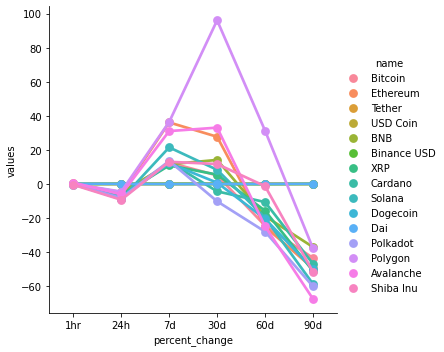

In [44]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')